# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ninda Kartika Putri
- **Email:** nindakartika.22020@mhs.unesa.ac.id
- **ID Dicoding:** ninda_kartika_putri

## Menentukan Pertanyaan Bisnis

-What are the demographics of bike hire customers by time of day?

-What are the demographics of bike hire customers by weather?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D

# Definisikan palet warna
colors = sns.color_palette("husl", 4)


## Data Wrangling

In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:

- We get information about bicycle rental data for each day.

### Assessing Data

In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- The code above is used to find missing values in the

### Cleaning Data

In [ ]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- The code above is used to clear the data type

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- The code above is used to explore hour_df data

In [ ]:
hour_df.groupby(by=["weathersit", "hr"]).agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean"]
})

instant    cnt                      
              nunique    sum  max  min        mean
weathersit hr                                     
1          0      489  28930  249    5   59.161554
           1      490  16854  165    1   34.395918
           2      478  10907  132    1   22.817992
           3      455   5458   66    1   11.995604
           4      457   2931   28    1    6.413567
...               ...    ...  ...  ...         ...
3          22      55   3869  215   11   70.345455
           23      67   3308  163    2   49.373134
4          1        1     23   23   23   23.000000
           16       1     36   36   36   36.000000
           18       1    164  164  164  164.000000

[75 rows x 5 columns]

Insight:

- displays the choreography between weather, time

Insight:
- in the exploration of hour_df it was found that in weather no one did not rent a bicycle, while for time 1 there were no bicycle renters

## Visualization & Explanatory Analysis

### Pertanyaan 1: What are the demographics of bicycle rental services based on time everyday?

<ipython-input-82-a9f6bb7b322d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


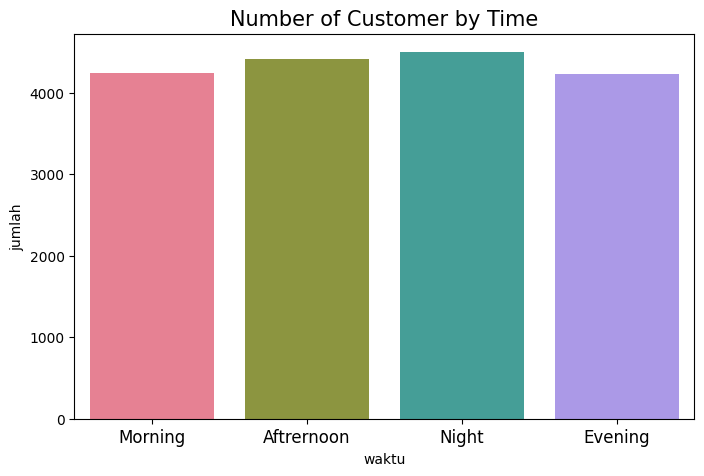

In [ ]:
byseason_df = hour_df.groupby(by="season")['instant'].nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(8, 5))

sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Time", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3], ['Morning', 'Aftrernoon', 'Night', 'Evening'])
plt.ylabel('jumlah')
plt.xlabel('waktu')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
Berdasarkan Visualisasi number of customer by time, time night merupakan penyewa terbanyak sedangkan di time evening merupakan terendah

### Pertanyaan 2:What are the demographics of bike rental customers by weather?

<ipython-input-83-b9aa1e8ac103>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-83-b9aa1e8ac103>:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


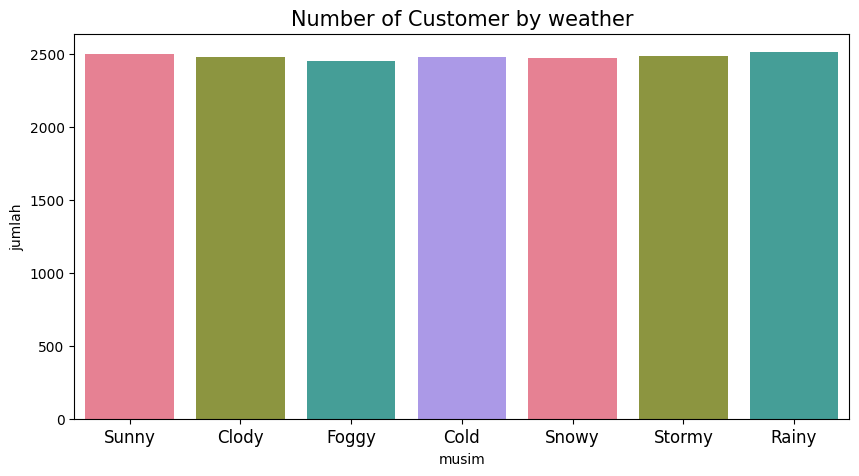

In [ ]:
byweekday_df = hour_df.groupby(by="weekday")['instant'].nunique().reset_index()
byweekday_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weekday",
    data=byweekday_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weather", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunny', 'Clody', 'Foggy', 'Cold', 'Snowy', 'Stormy', 'Rainy'])
plt.ylabel('jumlah')
plt.xlabel('musim')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**

Based on the visualisation of the number of customers by season, sunny and cold are the ones with the most tenants.

## Analisis Lanjutan (Opsional)

In [ ]:
import pandas as pd

# Convert the 'dteday' column to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# We assume that registered users represent those most relevant for RFM analysis
# Create a summary table for Recency, Frequency, and Monetary (based on 'registered' rentals)

# Recency: Calculate the most recent rental date and days since then
current_date = hour_df['dteday'].max()  # Ganti hour_df_df dengan hour_df
hour_df['recency'] = (current_date - hour_df['dteday']).dt.days  # Ganti hout_df dengan hour_df dan gunakan dt.days

# Frequency: Count how many times the service was used (hanya menghitung penyewa terdaftar)
frequency = hour_df['registered'].sum()

# Monetary: Total rentals (assuming the total rentals by registered users represent the monetary value)
monetary = hour_df['registered'].sum()

# Create the RFM DataFrame
rfm_data = pd.DataFrame({
    'recency': [hour_df['recency'].min()],
    'frequency': [frequency],
    'monetary': [monetary]
})

print(rfm_data)  # Menampilkan DataFrame RFM


   recency  frequency  monetary
0        0    2672662   2672662


**Insight:**
- Recency parameter yang digunakan untuk melihat kapan terakhir seorang penyewa melakukan transaksi sebesar 0
- Frequency parameter ini digunakan untuk mengidentifikasi seberapa sering seorang penyewa melakukan transaksi sebesar 2672662
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari penyewa tersebut sebesar 2672662

## Conclusion

-Demografi Pelayanan Penyewaan Sepeda Berdasarkan waktu setiap hari:
The graph shows that the number of bike renters increases significantly at night. This may be due to various factors, such as:
Night Activities: Many people choose to cycle at night as a form of recreation after work or as part of their active lifestyle.
More Comfortable Temperatures: Cooler temperatures at night make cycling more comfortable, especially in areas that are hot during the day. Special Events: It is possible that events or festivals held at night increase the interest in renting a bicycle as a means of transport.

Comparison with Morning and Evening:
While mornings and afternoons also show significant rental figures, the increase in the number of rentals at night shows that bicycle rentals are not limited to peak hours, but are also popular outside of working hours.
This gives an indication that customers have flexibility in their time of day, which opens up opportunities for companies to market bike rentals more aggressively in the evenings.


-Demografi Pelanggan Penyewa Sepeda Berdasarkan cuaca:
Weather Influence: The analysis results show that weather has a significant influence on bicycle rental demand. For example, customers rent bicycles more on sunny days compared to rainy or cloudy days. Good weather encourages more people to engage in outdoor activities, including renting bicycles. Customer Preferences: Certain types of weather, such as sunny days, tend to attract more customers, while bad weather such as rain or storms may reduce the number of rentals.


## Advanced analysis conclusion

Analysis of the demographics of the bicycle rental service by weather and time of day showed that good weather significantly increased the number of rentals, while bad weather reduced customer interest. Bicycle rentals are most prevalent in the evening, as well as in the morning and evening, reflecting the use of bicycles for sport and transport.

The link between weather and time of day creates opportunities for companies to develop efficient marketing strategies, such as promotions when the weather is favourable and providing additional facilities for night rentals. Further research can be conducted to explore other types of bicycles or services that match customer preferences. By integrating these findings, the company can improve customer experience and overall rental rates.






